# Activité sur les arbres de Grenoble, jour 4

Objectifs d'aujourd'hui : travailler sur la représentation géographique, et apréhender la complexité algorithmique

In [2]:
#coding: utf-8

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pathlib import Path

In [3]:
data_path = Path.cwd().parent / 'data/ESP_PUBLIC.IDENTITE_ARBRE.csv'
print(data_path.exists())

True


In [4]:
raw_data = pd.read_csv(data_path)

In [4]:
raw_data.columns

Index(['ELEM_POINT_ID', 'CODE', 'NOM', 'GENRE', 'GENRE_DESC', 'CATEGORIE',
       'CATEGORIE_DESC', 'SOUS_CATEGORIE', 'SOUS_CATEGORIE_DESC',
       'CODE_PARENT', 'CODE_PARENT_DESC', 'ADR_SECTEUR', 'BIEN_REFERENCE',
       'GENRE_BOTA', 'ESPECE', 'VARIETE', 'STADEDEDEVELOPPEMENT', 'EQUIPE',
       'REMARQUES', 'ANNEEDEPLANTATION', 'RAISONDEPLANTATION',
       'TRAITEMENTCHENILLES', 'COURRIER', 'IDENTIFIANTPLU',
       'TYPEIMPLANTATIONPLU', 'INTITULEPROTECTIONPLU', 'ANNEEABATTAGE',
       'ESSOUCHEMENT', 'DIAMETREARBRE', 'CAUSEABATTAGE', 'COLLECTIVITE',
       'GeoJSON'],
      dtype='object')

On va s'intéresser principalement à la colonne GeoJSON qui contient les coordonnées géographiques des arbres.

In [1]:
print("Ajout d'un commentaire pour voir l'effet de git sur un notebook, j'ai oublié de faire le diff")

Ajout d'un commentaire pour voir l'effet de git sur un notebook, j'ai oublié de faire le diff


In [5]:
import folium
import geojson
import json
from folium.plugins import FastMarkerCluster

In [6]:
print(folium.__version__)

0.11.0


In [6]:
coords_dict = raw_data["GeoJSON"].apply(json.loads)

In [7]:
coords = [[elem['coordinates'][1],elem['coordinates'][0]] for elem in coords_dict]

In [9]:
raw_data.iloc[12]['GENRE_BOTA']

'Robinia'

In [10]:
#avec des popups
gre = folium.Map(location = coords[0],zoom_start=16)
for (i,elem) in enumerate(coords[:10]) :
    popup = f"Espece : {raw_data.iloc[i]['GENRE_BOTA']} {raw_data.iloc[i]['ESPECE']}, plante en {raw_data.iloc[i]['ANNEEDEPLANTATION']}"
    folium.Marker(
        elem,
        popup=popup
    ).add_to(gre)
gre

In [11]:
#Méthode longue, ne fonctionne pas pour l'ensemble des données
gre = folium.Map(location = coords[0],zoom_start=12)
for elem in coords[:1000] :
    folium.Marker(elem).add_to(gre)
gre

In [12]:
#Méthode rapide
gre = folium.Map(location = coords[0],zoom_start=12)

FastMarkerCluster(coords).add_to(gre)
gre

## Calcul de la distance

### Méthode manuelle

In [8]:
import math as m

In [9]:
def haversine(pt1,pt2) :
    """Take two points [lat,lon]
    Return the distance on the sphere"""
    R = 6371009 # rayon terrestre moyen en m
    lat1 = pt1[0]/180*m.pi
    lon1 = pt1[1]/180*m.pi
    lat2 = pt2[0]/180*m.pi
    lon2 = pt2[1]/180*m.pi
    terme1 = (m.sin(0.5*(lat2-lat1)))**2
    terme2 = m.cos(lat1)*m.cos(lat1)*(m.sin(0.5*(lon2-lon1)))**2
    dist = 2*R*m.asin(m.sqrt(terme1+terme2))
    return dist

In [15]:
%%timeit
for elem in coords :
    haversine(coords[0],elem)

79.6 ms ± 1.79 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
from geopy.distance import great_circle

In [17]:
for elem in coords[:3] :
    print(haversine(coords[0],elem))
    print(great_circle(coords[0],elem))

0.0
0.0 km
43.569742374223274
0.043569784285328796 km
8.028631419747173
0.008028633171510155 km


In [18]:
%%timeit
for elem in coords :
    great_circle(coords[0],elem)

518 ms ± 1.76 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
%%timeit
great_circle(coords[5],coords[29])

16.4 µs ± 55.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [20]:
%%timeit
haversine(coords[5],coords[29])

2.39 µs ± 21.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Etonnament, ma fonction est plus rapide

In [21]:
#%%timeit
mem = 0
myPos = [45.1873655, 5.7296159]
dist_min = haversine(myPos,coords[0])
for (i,elem) in enumerate(coords) :
    dist = haversine(myPos,elem)
    if dist < dist_min :
        mem = i
        dist_min = dist
#print(f"L'arbre le plus proche de chez moi est le {mem}, situé à {dist_min:.0f}m.")

In [11]:
geo_arbres = raw_data[['ELEM_POINT_ID',"GeoJSON"]].copy()
geo_arbres['latlon'] = geo_arbres["GeoJSON"].apply(lambda x: [json.loads(x)["coordinates"][1],json.loads(x)["coordinates"][0]])
geo_arbres['lat'] = geo_arbres["GeoJSON"].apply(lambda x: json.loads(x)["coordinates"][1])
geo_arbres['lon'] = geo_arbres["GeoJSON"].apply(lambda x: json.loads(x)["coordinates"][0])

In [12]:
geo_arbres

,ELEM_POINT_ID,GeoJSON,latlon,lat,lon
0,16750,"{""type"":""Point"",""coordinates"":[5.7394161255246...","[45.1911217700938, 5.73941612552464]",45.191122,5.739416
1,20142,"{""type"":""Point"",""coordinates"":[5.7397428849165...","[45.1908047491604, 5.73974288491655]",45.190805,5.739743
2,23843,"{""type"":""Point"",""coordinates"":[5.7393229609447...","[45.1910917297403, 5.73932296094475]",45.191092,5.739323
3,23841,"{""type"":""Point"",""coordinates"":[5.7410808202830...","[45.1892629840984, 5.74108082028307]",45.189263,5.741081
4,1778,"{""type"":""Point"",""coordinates"":[5.7408124079286...","[45.1903250401832, 5.7408124079286]",45.190325,5.740812
...,...,...,...,...,...
31887,16922,"{""type"":""Point"",""coordinates"":[5.7251768715205...","[45.1709135151563, 5.72517687152055]",45.170914,5.725177
31888,12659,"{""type"":""Point"",""coordinates"":[5.7260735681418...","[45.1700638971328, 5.72607356814182]",45.170064,5.726074
31889,1869,"{""type"":""Point"",""coordinates"":[5.7253254570262...","[45.1695265500223, 5.72532545702624]",45.169527,5.725325
31890,24296,"{""type"":""Point"",""coordinates"":[5.7262050374391...","[45.1704091971503, 5.72620503743917]",45.170409,5.726205


In [24]:
geo_arbres['dist_home'] = geo_arbres.apply(lambda x: x['lat']+x['lon'],axis=1)

In [25]:
geo_arbres

,ELEM_POINT_ID,GeoJSON,latlon,lat,lon,dist_home
0,16750,"{""type"":""Point"",""coordinates"":[5.7394161255246...","[45.1911217700938, 5.73941612552464]",45.191122,5.739416,50.930538
1,20142,"{""type"":""Point"",""coordinates"":[5.7397428849165...","[45.1908047491604, 5.73974288491655]",45.190805,5.739743,50.930548
2,23843,"{""type"":""Point"",""coordinates"":[5.7393229609447...","[45.1910917297403, 5.73932296094475]",45.191092,5.739323,50.930415
3,23841,"{""type"":""Point"",""coordinates"":[5.7410808202830...","[45.1892629840984, 5.74108082028307]",45.189263,5.741081,50.930344
4,1778,"{""type"":""Point"",""coordinates"":[5.7408124079286...","[45.1903250401832, 5.7408124079286]",45.190325,5.740812,50.931137
...,...,...,...,...,...,...
31887,16922,"{""type"":""Point"",""coordinates"":[5.7251768715205...","[45.1709135151563, 5.72517687152055]",45.170914,5.725177,50.896090
31888,12659,"{""type"":""Point"",""coordinates"":[5.7260735681418...","[45.1700638971328, 5.72607356814182]",45.170064,5.726074,50.896137
31889,1869,"{""type"":""Point"",""coordinates"":[5.7253254570262...","[45.1695265500223, 5.72532545702624]",45.169527,5.725325,50.894852
31890,24296,"{""type"":""Point"",""coordinates"":[5.7262050374391...","[45.1704091971503, 5.72620503743917]",45.170409,5.726205,50.896614


In [14]:
#les 10 arbres les plus proches de chez moi
myPos = [45.1873655, 5.7296159]
geo_arbres['dist_home'] = geo_arbres['latlon'].apply(lambda x: haversine(myPos,x))
geo_arbres.sort_values('dist_home')[:10]

,ELEM_POINT_ID,GeoJSON,latlon,lat,lon,dist_home
30611,40364,"{""type"":""Point"",""coordinates"":[5.7293478446873...","[45.1877449540541, 5.72934784468732]",45.187745,5.729348,47.133763
30610,40365,"{""type"":""Point"",""coordinates"":[5.7294183174001...","[45.1877694407114, 5.72941831740016]",45.187769,5.729418,47.510353
11327,4338,"{""type"":""Point"",""coordinates"":[5.7302421414034...","[45.1873318617423, 5.73024214140346]",45.187332,5.730242,49.220402
30609,40366,"{""type"":""Point"",""coordinates"":[5.7295217886333...","[45.1878085082788, 5.72952178863337]",45.187809,5.729522,49.809421
11326,15597,"{""type"":""Point"",""coordinates"":[5.7303113393077...","[45.1874091788978, 5.73031133930773]",45.187409,5.730311,54.717045
30608,40367,"{""type"":""Point"",""coordinates"":[5.7296616401662...","[45.1878591687453, 5.72966164016626]",45.187859,5.729662,55.010453
30527,40368,"{""type"":""Point"",""coordinates"":[5.7297805827171...","[45.1879024360398, 5.72978058271717]",45.187902,5.729781,61.083643
11325,11938,"{""type"":""Point"",""coordinates"":[5.7304222178898...","[45.187260062879, 5.73042221788984]",45.187260,5.730422,64.268949
30526,40369,"{""type"":""Point"",""coordinates"":[5.7299114961941...","[45.187950401898, 5.72991149619415]",45.187950,5.729911,69.040691
11329,558,"{""type"":""Point"",""coordinates"":[5.7305862735593...","[45.1871930533859, 5.73058627355934]",45.187193,5.730586,78.427701


In [27]:
gre = folium.Map(location = geo_arbres.sort_values('dist_home').iloc[0]['latlon'],zoom_start=16)
FastMarkerCluster(geo_arbres.sort_values('dist_home')[:10]['latlon']).add_to(gre)
gre

## Plongée dans une matrice de distance

In [15]:
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
from sklearn.metrics.pairwise import haversine_distances

In [29]:
#print(sklearn.__version__)

NameError: name 'sklearn' is not defined

In [30]:
haversine_distances([[45.1877449540541, 5.72934784468732]], [[45.1877694407114, 5.72941831740016]])

array([[3.51211316e-05]])

In [31]:
geo_arbres.latlon.to_numpy()

array([list([45.1911217700938, 5.73941612552464]),
       list([45.1908047491604, 5.73974288491655]),
       list([45.1910917297403, 5.73932296094475]), ...,
       list([45.1695265500223, 5.72532545702624]),
       list([45.1704091971503, 5.72620503743917]),
       list([45.1708571577454, 5.72513683349907])], dtype=object)

In [32]:
geo_arbres.latlon[0].dtype()

AttributeError: 'list' object has no attribute 'dtype'

In [ ]:
# pas trouvé comment convertir les tuples en array
#haversine_distances(geo_arbres.latlon.to_numpy(),geo_arbres.latlon.to_numpy())

In [ ]:
# méthode trop longue, à ne surtout pas exécuter
# arr = [[lat, lon] for (lat, lon) in zip(geo_arbres.lat,geo_arbres.lon)]
# distances = haversine_distances(arr,arr)

Une meilleure idée pour calculer ça : calculer pour chaque arbre sa distance moyenne aux autres, puis faire la moyenne de ces valeurs. Mais on calcule quand même n² distances

In [33]:
arr = [[lat, lon] for (lat, lon) in zip(geo_arbres.lat,geo_arbres.lon)]

In [36]:
%%timeit
[haversine(geo_arbres.latlon[0],elem) for elem in geo_arbres.latlon]

476 ms ± 974 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [34]:
#Calcule toujours une matrice de distance, trop long
#dist = haversine_distances(arr)

KeyboardInterrupt: 

Calculer la distance d'un arbre à tous les autres prend 0.5s. Trop long à calculer pour tous les points.

In [16]:
small_arr = [[lat, lon] for (lat, lon) in zip(geo_arbres.lat[:10],geo_arbres.lon[:10])]
bigger_arr = [[lat, lon] for (lat, lon) in zip(geo_arbres.lat[:20],geo_arbres.lon[:20])]

In [41]:
small_arr

[[45.1911217700938, 5.73941612552464],
 [45.1908047491604, 5.73974288491655],
 [45.1910917297403, 5.73932296094475],
 [45.1892629840984, 5.74108082028307],
 [45.1903250401832, 5.7408124079286],
 [45.1904063650615, 5.74059734046078],
 [45.1892058130306, 5.73969341080384],
 [45.1893121096695, 5.73987665069921],
 [45.1893869923109, 5.74155751086659],
 [45.1892710942945, 5.74142767526293]]

In [45]:
%%timeit
pdist(small_arr,haversine)

379 µs ± 2.61 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [46]:
%%timeit
pdist(bigger_arr,haversine)

1.5 ms ± 7.23 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Avec une méthode approximée ? En tirant au hasard 2 points et en claculant leur distance.

In [17]:
from random import randrange

In [18]:
#%%timeit
dist = 0
count = 0
for i in range(10000) :
    int1 = randrange(len(geo_arbres))
    int2 = randrange(len(geo_arbres))
    while int1 == int2 :
        #print("Pas de bol")
        int2 = randrange(len(geo_arbres))
    dist += haversine(geo_arbres.latlon[int1],geo_arbres.latlon[int2])
    count += 1
dist_moy = dist/count
print(f"La distance moyenne entre les arbres est {dist_moy:.0f}m")

La distance moyenne entre les arbres est 2081m


In [19]:
#%%timeit
dist_moy = np.zeros(30)
for (j,val) in enumerate(dist_moy) :
    dist = 0
    count = 0
    for i in range(300) :
        int1 = randrange(len(geo_arbres))
        int2 = randrange(len(geo_arbres))
        while int1 == int2 :
            int2 = randrange(len(geo_arbres))
        dist += haversine(geo_arbres.latlon[int1],geo_arbres.latlon[int2])
        count += 1
    dist_moy[j] = dist/count
print(f"La distance moyenne entre les arbres est ({dist_moy.mean():.0f}+/-{dist_moy.std():.0f})  m")

La distance moyenne entre les arbres est (2106+/-63)  m


Avec cette méthode approchée, on trouve le résultat en 0.3s.

In [67]:
dist_moy

2059.831657409902

## Travail sur les voisins

In [20]:
from sklearn.neighbors import KDTree

In [21]:
# on utilise la metrique de base de KDTree qui est Minkowski
# puisque haversine n'est pas utilisable pour cette méthode
tree = KDTree(np.array(small_arr))

In [102]:
# la query renvoie la distance mesure et les indices des points les plus proches
tree.query([np.array(small_arr)[0]],k=3)

(array([[0.00000000e+00, 9.78880063e-05, 4.55273514e-04]]), array([[0, 2, 1]]))

In [106]:
geo_arbres

,ELEM_POINT_ID,GeoJSON,latlon,lat,lon,dist_home
0,16750,"{""type"":""Point"",""coordinates"":[5.7394161255246...","[45.1911217700938, 5.73941612552464]",45.191122,5.739416,874.262804
1,20142,"{""type"":""Point"",""coordinates"":[5.7397428849165...","[45.1908047491604, 5.73974288491655]",45.190805,5.739743,880.977930
2,23843,"{""type"":""Point"",""coordinates"":[5.7393229609447...","[45.1910917297403, 5.73932296094475]",45.191092,5.739323,866.253025
3,23841,"{""type"":""Point"",""coordinates"":[5.7410808202830...","[45.1892629840984, 5.74108082028307]",45.189263,5.741081,922.937985
4,1778,"{""type"":""Point"",""coordinates"":[5.7408124079286...","[45.1903250401832, 5.7408124079286]",45.190325,5.740812,937.143198
...,...,...,...,...,...,...
31887,16922,"{""type"":""Point"",""coordinates"":[5.7251768715205...","[45.1709135151563, 5.72517687152055]",45.170914,5.725177,1862.163636
31888,12659,"{""type"":""Point"",""coordinates"":[5.7260735681418...","[45.1700638971328, 5.72607356814182]",45.170064,5.726074,1943.779391
31889,1869,"{""type"":""Point"",""coordinates"":[5.7253254570262...","[45.1695265500223, 5.72532545702624]",45.169527,5.725325,2011.899486
31890,24296,"{""type"":""Point"",""coordinates"":[5.7262050374391...","[45.1704091971503, 5.72620503743917]",45.170409,5.726205,1904.311673


In [22]:
full_tree = KDTree(geo_arbres[['lat','lon']].to_numpy())

In [23]:
dist, pos = full_tree.query(geo_arbres[['lat','lon']].to_numpy(),k=2)
geo_arbres['Voisin'] = pos[:,1]
geo_arbres['Mink_dist'] = dist[:,1]
geo_arbres

,ELEM_POINT_ID,GeoJSON,latlon,lat,lon,dist_home,Voisin,Mink_dist
0,16750,"{""type"":""Point"",""coordinates"":[5.7394161255246...","[45.1911217700938, 5.73941612552464]",45.191122,5.739416,874.262804,30640,0.000046
1,20142,"{""type"":""Point"",""coordinates"":[5.7397428849165...","[45.1908047491604, 5.73974288491655]",45.190805,5.739743,880.977930,69,0.000095
2,23843,"{""type"":""Point"",""coordinates"":[5.7393229609447...","[45.1910917297403, 5.73932296094475]",45.191092,5.739323,866.253025,80,0.000039
3,23841,"{""type"":""Point"",""coordinates"":[5.7410808202830...","[45.1892629840984, 5.74108082028307]",45.189263,5.741081,922.937985,30953,0.000032
4,1778,"{""type"":""Point"",""coordinates"":[5.7408124079286...","[45.1903250401832, 5.7408124079286]",45.190325,5.740812,937.143198,30653,0.000047
...,...,...,...,...,...,...,...,...
31887,16922,"{""type"":""Point"",""coordinates"":[5.7251768715205...","[45.1709135151563, 5.72517687152055]",45.170914,5.725177,1862.163636,31891,0.000069
31888,12659,"{""type"":""Point"",""coordinates"":[5.7260735681418...","[45.1700638971328, 5.72607356814182]",45.170064,5.726074,1943.779391,31865,0.000065
31889,1869,"{""type"":""Point"",""coordinates"":[5.7253254570262...","[45.1695265500223, 5.72532545702624]",45.169527,5.725325,2011.899486,30341,0.000050
31890,24296,"{""type"":""Point"",""coordinates"":[5.7262050374391...","[45.1704091971503, 5.72620503743917]",45.170409,5.726205,1904.311673,31767,0.000090


In [113]:
haversine(geo_arbres['latlon'][200],geo_arbres['latlon'][geo_arbres['Voisin'][200]])

3.678240246568804

In [24]:
geo_arbres['Haversine_dist'] = geo_arbres.apply(
    lambda x : haversine(x['latlon'],geo_arbres['latlon'][x['Voisin']]),
    axis=1
)

In [25]:
geo_arbres

,ELEM_POINT_ID,GeoJSON,latlon,lat,lon,dist_home,Voisin,Mink_dist,Haversine_dist
0,16750,"{""type"":""Point"",""coordinates"":[5.7394161255246...","[45.1911217700938, 5.73941612552464]",45.191122,5.739416,874.262804,30640,0.000046,3.599409
1,20142,"{""type"":""Point"",""coordinates"":[5.7397428849165...","[45.1908047491604, 5.73974288491655]",45.190805,5.739743,880.977930,69,0.000095,10.515706
2,23843,"{""type"":""Point"",""coordinates"":[5.7393229609447...","[45.1910917297403, 5.73932296094475]",45.191092,5.739323,866.253025,80,0.000039,3.078678
3,23841,"{""type"":""Point"",""coordinates"":[5.7410808202830...","[45.1892629840984, 5.74108082028307]",45.189263,5.741081,922.937985,30953,0.000032,3.256254
4,1778,"{""type"":""Point"",""coordinates"":[5.7408124079286...","[45.1903250401832, 5.7408124079286]",45.190325,5.740812,937.143198,30653,0.000047,3.823123
...,...,...,...,...,...,...,...,...,...
31887,16922,"{""type"":""Point"",""coordinates"":[5.7251768715205...","[45.1709135151563, 5.72517687152055]",45.170914,5.725177,1862.163636,31891,0.000069,7.008729
31888,12659,"{""type"":""Point"",""coordinates"":[5.7260735681418...","[45.1700638971328, 5.72607356814182]",45.170064,5.726074,1943.779391,31865,0.000065,6.482060
31889,1869,"{""type"":""Point"",""coordinates"":[5.7253254570262...","[45.1695265500223, 5.72532545702624]",45.169527,5.725325,2011.899486,30341,0.000050,3.899096
31890,24296,"{""type"":""Point"",""coordinates"":[5.7262050374391...","[45.1704091971503, 5.72620503743917]",45.170409,5.726205,1904.311673,31767,0.000090,7.495589


(array([10100.,  3749.,  2593.,  1694.,  1661.,  1910.,  1374.,  1531.,
         2123.,  5155.]),
 array([8.99320336e-06, 9.37006342e-06, 9.74692349e-06, 1.01237836e-05,
        1.05006436e-05, 1.08775037e-05, 1.12543637e-05, 1.16312238e-05,
        1.20080839e-05, 1.23849439e-05, 1.27618040e-05]),
 <a list of 10 Patch objects>)

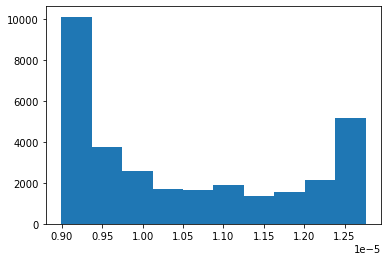

In [118]:
plt.hist(geo_arbres['Mink_dist']/geo_arbres['Haversine_dist'])

On a tout de même une variation de 30% entre les distances, avec un comportement non-linéaire entre les 2 métriques.

In [26]:
# une autre réponse à la distance moyenne entre les arbres :
print(f"Les arbres sont en moyenne à {geo_arbres['Haversine_dist'].mean():.2f}m les uns des autres.")

Les arbres sont en moyenne à 6.34m les uns des autres.


Regardons les arbres les plus et moins entourés.

In [30]:
geo_arbres['Nb_voisin'] = full_tree.query_radius(
    geo_arbres[['lat','lon']].to_numpy(),
    r=geo_arbres['Mink_dist'].max()*0.5, # on prend une portion de la distance maximale entre les arbres
    count_only = True
) - 1 # pour ne pas compter l'arbre lui-même

In [31]:
geo_arbres

,ELEM_POINT_ID,GeoJSON,latlon,lat,lon,dist_home,Voisin,Mink_dist,Haversine_dist,Nb_voisin
0,16750,"{""type"":""Point"",""coordinates"":[5.7394161255246...","[45.1911217700938, 5.73941612552464]",45.191122,5.739416,874.262804,30640,0.000046,3.599409,265
1,20142,"{""type"":""Point"",""coordinates"":[5.7397428849165...","[45.1908047491604, 5.73974288491655]",45.190805,5.739743,880.977930,69,0.000095,10.515706,380
2,23843,"{""type"":""Point"",""coordinates"":[5.7393229609447...","[45.1910917297403, 5.73932296094475]",45.191092,5.739323,866.253025,80,0.000039,3.078678,266
3,23841,"{""type"":""Point"",""coordinates"":[5.7410808202830...","[45.1892629840984, 5.74108082028307]",45.189263,5.741081,922.937985,30953,0.000032,3.256254,279
4,1778,"{""type"":""Point"",""coordinates"":[5.7408124079286...","[45.1903250401832, 5.7408124079286]",45.190325,5.740812,937.143198,30653,0.000047,3.823123,322
...,...,...,...,...,...,...,...,...,...,...
31887,16922,"{""type"":""Point"",""coordinates"":[5.7251768715205...","[45.1709135151563, 5.72517687152055]",45.170914,5.725177,1862.163636,31891,0.000069,7.008729,45
31888,12659,"{""type"":""Point"",""coordinates"":[5.7260735681418...","[45.1700638971328, 5.72607356814182]",45.170064,5.726074,1943.779391,31865,0.000065,6.482060,37
31889,1869,"{""type"":""Point"",""coordinates"":[5.7253254570262...","[45.1695265500223, 5.72532545702624]",45.169527,5.725325,2011.899486,30341,0.000050,3.899096,38
31890,24296,"{""type"":""Point"",""coordinates"":[5.7262050374391...","[45.1704091971503, 5.72620503743917]",45.170409,5.726205,1904.311673,31767,0.000090,7.495589,48


In [32]:
geo_arbres.sort_values(['Nb_voisin']).head(10)

,ELEM_POINT_ID,GeoJSON,latlon,lat,lon,dist_home,Voisin,Mink_dist,Haversine_dist,Nb_voisin
10974,1686,"{""type"":""Point"",""coordinates"":[5.7472661393387...","[45.1848094542054, 5.74726613933871]",45.184809,5.747266,1412.134222,1165,0.002022,158.667143,0
7807,26179,"{""type"":""Point"",""coordinates"":[5.7035143641663...","[45.1923187769163, 5.70351436416631]",45.192319,5.703514,2118.411198,7806,0.000145,12.593318,1
846,13084,"{""type"":""Point"",""coordinates"":[5.7504458752577...","[45.1700788319866, 5.75044587525774]",45.170079,5.750446,2521.834784,845,0.000237,25.637998,1
845,20370,"{""type"":""Point"",""coordinates"":[5.7503715589082...","[45.1698542959895, 5.75037155890827]",45.169854,5.750372,2537.178936,846,0.000237,25.638004,1
7806,26178,"{""type"":""Point"",""coordinates"":[5.7036421209931...","[45.1922500716665, 5.70364212099316]",45.192250,5.703642,2106.762431,7807,0.000145,12.593328,1
17384,24679,"{""type"":""Point"",""coordinates"":[5.7297110245068...","[45.1791186394275, 5.72971102450686]",45.179119,5.729711,917.040653,21408,0.000666,64.691461,1
29962,13700,"{""type"":""Point"",""coordinates"":[5.7330280650281...","[45.1761488255187, 5.73302806502813]",45.176149,5.733028,1275.583300,29961,0.000995,79.442088,1
21592,20590,"{""type"":""Point"",""coordinates"":[5.7214779299528...","[45.174261572592, 5.7214779299528]",45.174262,5.721478,1590.554717,21594,0.000128,10.885685,2
806,16729,"{""type"":""Point"",""coordinates"":[5.7514614406758...","[45.1748913190023, 5.75146144067581]",45.174891,5.751461,2203.398479,808,0.000041,4.003162,2
810,5459,"{""type"":""Point"",""coordinates"":[5.7514618614384...","[45.174845298291, 5.75146186143849]",45.174845,5.751462,2206.649037,808,0.000034,2.938951,2


In [33]:
geo_arbres.sort_values(['Nb_voisin'],ascending=False).head(10)

,ELEM_POINT_ID,GeoJSON,latlon,lat,lon,dist_home,Voisin,Mink_dist,Haversine_dist,Nb_voisin
5530,10414,"{""type"":""Point"",""coordinates"":[5.7364276944748...","[45.164087549018, 5.73642769447489]",45.164088,5.736428,2642.870048,5447,0.000062,5.378184,492
5449,38542,"{""type"":""Point"",""coordinates"":[5.7362545287867...","[45.1641342201131, 5.73625452878678]",45.164134,5.736255,2635.074675,5448,0.000042,4.023830,491
5447,38544,"{""type"":""Point"",""coordinates"":[5.736373753091,...","[45.1641174299944, 5.736373753091]",45.164117,5.736374,2638.764314,5531,0.000057,5.319954,491
5446,38545,"{""type"":""Point"",""coordinates"":[5.7364732880702...","[45.1641384966965, 5.73647328807029]",45.164138,5.736473,2638.047518,5657,0.000059,6.479891,490
5448,38543,"{""type"":""Point"",""coordinates"":[5.7362835580755...","[45.1641043776545, 5.73628355807551]",45.164104,5.736284,2638.777332,5449,0.000042,4.023831,490
5531,10411,"{""type"":""Point"",""coordinates"":[5.7363304700645...","[45.164080583694, 5.73633047006454]",45.164081,5.736330,2642.100529,5448,0.000053,4.530729,488
5441,35606,"{""type"":""Point"",""coordinates"":[5.7363306011249...","[45.1641545475219, 5.73633060112492]",45.164155,5.736331,2634.043446,5447,0.000057,5.336694,487
5551,17827,"{""type"":""Point"",""coordinates"":[5.7361887391994...","[45.1641025199801, 5.73618873919942]",45.164103,5.736189,2637.518488,5633,0.000050,4.453775,485
5633,25236,"{""type"":""Point"",""coordinates"":[5.7362300035728...","[45.164074991779, 5.73623000357289]",45.164075,5.736230,2641.153372,5551,0.000050,4.453776,485
5536,14175,"{""type"":""Point"",""coordinates"":[5.7361760361244...","[45.1640360363178, 5.73617603612441]",45.164036,5.736176,2644.575467,5653,0.000047,4.282465,481


In [135]:
a = np.array([1,2,3])
type(a)

numpy.ndarray

In [34]:
dist, pos = full_tree.query(geo_arbres[['lat','lon']].to_numpy(),k=5)
geo_arbres['k_voisins'] = [elem[1:] for elem in pos]
geo_arbres['dist_vois'] = geo_arbres.apply(
    lambda x : np.array([[haversine(x['latlon'],geo_arbres['latlon'][vois])] for vois in x['k_voisins']]).mean(),
    axis=1
)

In [35]:
list_col = ['ELEM_POINT_ID','Voisin','Haversine_dist','Nb_voisin','dist_vois']

In [36]:
geo_arbres[['ELEM_POINT_ID','Voisin','Haversine_dist','Nb_voisin','dist_vois']].sort_values(['dist_vois']).head()

,ELEM_POINT_ID,Voisin,Haversine_dist,Nb_voisin,dist_vois
6158,35532,6159,0.440524,272,0.576932
8351,3572,8253,0.485539,246,0.607675
8247,11135,8154,0.647736,316,0.620352
30286,42168,30285,0.396943,147,0.643080
30287,42167,30285,0.443080,147,0.666658


In [37]:
geo_arbres[list_col].sort_values(['dist_vois'],ascending=False).head()

,ELEM_POINT_ID,Voisin,Haversine_dist,Nb_voisin,dist_vois
10974,1686,1165,158.667143,0,180.139520
7807,26179,7806,12.593318,1,153.756372
7806,26178,7807,12.593328,1,144.339919
17384,24679,21408,64.691461,1,104.799291
12821,4040,17210,78.259427,2,102.396785


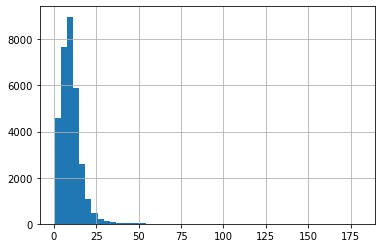

In [162]:
geo_arbres['dist_vois'].hist(bins=50)

In [38]:
raw_data.sample(10)

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,COURRIER,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,GeoJSON
12294,40706,ESP39059,ESP39059,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP283,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7165477333808..."
18261,773,ESP2006,ESP2006,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP819,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7296586348212..."
22899,21652,ESP21342,ESP21342,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP701,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7284849576920..."
22477,2145,ESP1460,ESP1460,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP733,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7287678362133..."
8711,22140,ESP15742,ESP15742,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7327023200968..."
12262,3769,ESP15839,ESP15839,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP262,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7121383283547..."
25619,25168,ESP30367,ESP30367,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP436,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7369432504579..."
10376,40665,ESP39051,ESP39051,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1303,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7187728377287..."
31130,12304,ESP18249,ESP18249,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP977,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7339894323007..."
25786,9367,ESP13753,ESP13753,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP397,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7395962884294..."


Idée pour la suite : afficher un arbres et ses voisins

In [46]:
pos = 10974
gre = folium.Map(location = geo_arbres.iloc[pos]['latlon'],zoom_start=16)
popup = f"Arbre de reference"
folium.Marker(
    geo_arbres.iloc[pos]['latlon'],
    popup=popup,
    icon=folium.Icon(color='green')
).add_to(gre)
for (i,elem) in enumerate(geo_arbres.iloc[pos]['k_voisins']) :
    popup = f"Voisin {i}, a {haversine(geo_arbres.iloc[pos]['latlon'],geo_arbres.iloc[elem]['latlon']):.2f} m"
    folium.Marker(
        geo_arbres.iloc[elem]['latlon'],
        popup=popup
    ).add_to(gre)
gre